In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv
/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv


In [2]:
import pandas as pd
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)  # No limit on column width

In [3]:
df_train = pd.read_csv("/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv", header=0)
df_train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
df_train[df_train["label"] == 0]["tweet"].iloc[2]

'  bihday your majesty'

In [5]:
df_train.shape

(31962, 3)

In [6]:
df_train[df_train["label"] == 0].count()


id       29720
label    29720
tweet    29720
dtype: int64

In [7]:
#df.query('label == 0').count()
len(df_train[df_train["label"] == 0])

29720

In [8]:
len(df_train[df_train["label"] == 1])

2242

In [9]:
df_test = pd.read_csv("/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv")

In [10]:
df_test.shape

(17197, 2)

In [11]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
import missingno as msno

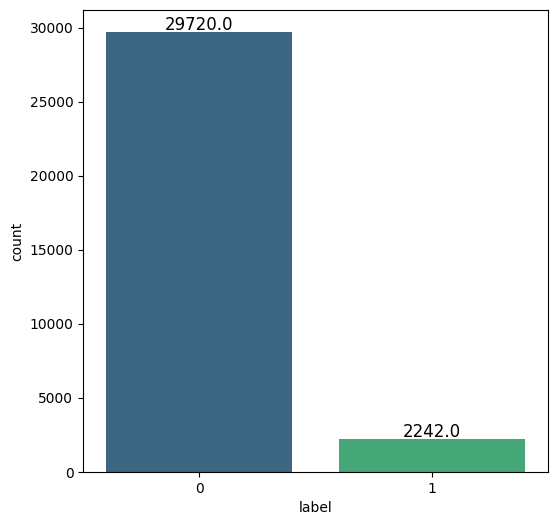

In [14]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_train, x="label", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Adjust text position (optional)
                textcoords='offset points')

# Show the plot
plt.show()

In [15]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [16]:
df_train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

In [17]:
df_train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


## Cleanse Data

In [18]:
import re

In [19]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) # remove URLs
    text = re.sub(r"@\w+", "", text) #remove mentions
    text = re.sub(r"#\w+", "", text) #remove hashtags
    #text = re.sub(r"[^\w\s]", "", text) #remove special characters
    return text.lower().strip()

In [20]:
df_train['tweet'][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [21]:
df_train['cleaned_tweet']= df_train['tweet'].apply(clean_text)

In [22]:
df_train.head(20)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so !


In [23]:
def decode_text(text):
    try:
        #Handling the characters's error
        return text.encode('latin1').decode('utf-8', errors='ignore')
    except UnicodeDecodeError:
        return text

In [24]:
def contains_invalid_encoding(text):
    if isinstance(text, str):
        return bool(re.search(r'[^\x00-\x7F]+', text))  
    return False  

In [25]:
df_train['cleaned_tweet'] = df_train['cleaned_tweet'].astype(str)

df_train['decoded_tweet'] = df_train['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)

invalid_tweets = df_train[df_train['cleaned_tweet'].apply(contains_invalid_encoding)]

invalid_tweets_after_decoding = df_train[df_train['cleaned_tweet'] != df_train['decoded_tweet']]

print(f"Những tweet chứa ký tự mã hóa sai (ngoài bảng ASCII):")
print(invalid_tweets[['cleaned_tweet']])  

Những tweet chứa ký tự mã hóa sai (ngoài bảng ASCII):
                                                                     cleaned_tweet
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦
6                                                 camping tomorrow        dannyâ¦
7      the next school year is the year for exams.ð¯ can't think about that ð­
8                                             we won!!! love the land!!!       â¦
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may
...                                                                            ...
31939                                       whew  ð it's a productive and   !!!
31942                                             this week is flying by    -   ¦
31945                                                    feel like... ðð¶ð
31955                                   less than 2 weeks ððð¼ð¹ððµ
31957               ate  isz that

In [26]:
print(f"Những tweet đã được mã hóa lại:")
print(invalid_tweets_after_decoding[['cleaned_tweet', 'decoded_tweet']])

Những tweet đã được mã hóa lại:
                                                                     cleaned_tweet  \
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   
6                                                 camping tomorrow        dannyâ¦   
7      the next school year is the year for exams.ð¯ can't think about that ð­   
8                                             we won!!! love the land!!!       â¦   
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may   
...                                                                            ...   
31939                                       whew  ð it's a productive and   !!!   
31942                                             this week is flying by    -   ¦   
31945                                                    feel like... ðð¶ð   
31955                                   less than 2 weeks ððð¼ð¹ððµ   
31957               at

In [27]:
repeated_char_train = []
for i, tweet in enumerate(df_train['decoded_tweet']):
  if re.match(r'\w*(\w)\1+',tweet):
    repeated_char_train.append(i)

In [28]:
len(repeated_char_train)

4583

In [29]:
#Repeated char function 
def repeated_char(text):
  text = re.sub(r'(\w)\1{2,}',r'\1',text)
  return text

In [30]:
df_train['clean_duplicate']=df_train['decoded_tweet'].apply(repeated_char)

In [31]:
df_train.head(20)

,id,label,tweet,cleaned_tweet,decoded_tweet,clean_duplicate
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now #motivation,factsguide: society now,factsguide: society now,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦,camping tomorrow danny…,camping tomorrow danny…
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­,the next school year is the year for exams.😯 can't think about that 😭,the next school year is the year for exams.😯 can't think about that 😭
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! â¦,we won!!! love the land!!! …,we won!!! love the land!!! …
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so !,welcome here ! i'm it's so !,welcome here ! i'm it's so !


## Emoji Processing

In [32]:
!pip install emoji

In [33]:
import emoji
def emoji_text_trans(text):
    text= emoji.demojize(text).replace (':', ' ')

    #delete repeated emoji 
    tokenize= text.split()
    repeated_list=[]
    for word in tokenize:
        if word not in repeated_list:
            repeated_list.append(word)

    text=' '.join(word for word in repeated_list)
    text= text.replace("_", " ").replace("-", " ")
    return text

In [34]:
df_train["deemoji_tweet"] = df_train["clean_duplicate"].apply(emoji_text_trans)

## Cleansing df_test

In [35]:
df_test['cleaned_tweet']= df_test['tweet'].apply(clean_text)
df_test['cleaned_tweet'] = df_test['cleaned_tweet'].astype(str)

df_test['decoded_tweet'] = df_test['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)
df_test['clean_duplicate']=df_test['decoded_tweet'].apply(repeated_char)
df_test["deemoji_tweet"] = df_test["clean_duplicate"].apply(emoji_text_trans)

## Distill BERT

In [36]:
import gc
import torch
import numpy as np
from transformers import DistilBertModel, DistilBertTokenizer

USE_GPU = True
device = torch.device("cuda" if USE_GPU and torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Load model and tokenizer
model_class, tokenizer_class, pretrained_weights = (DistilBertModel, DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights).to(device)

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [37]:

def tokenize_data(data, tokenizer, max_length=100):
    tokenized = data.apply(lambda x: tokenizer.encode(
        str(x), add_special_tokens=True, max_length=max_length, truncation=True
    ))
    return tokenized


def data_split(tokenized_data, batch_size):
    return [tokenized_data[i:i + batch_size] for i in range(0, len(tokenized_data), batch_size)]


def DistilBert_model(list_df):
    features = []
    for count, batch in enumerate(list_df, 1):
        print(f'Processing batch {count}/{len(list_df)}')

        
        max_len = max([len(i) for i in batch])
        padded = np.array([i + [0] * (max_len - len(i)) for i in batch])
        attention_mask = np.where(padded != 0, 1, 0)

        
        input_ids = torch.tensor(padded, dtype=torch.long).to(device)
        attention_mask = torch.tensor(attention_mask, dtype=torch.long).to(device)

        
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            batch_features = outputs[0][:, 0, :].cpu().numpy()

        features.append(batch_features)

        del input_ids, attention_mask, outputs
        torch.cuda.empty_cache()
        gc.collect()

    return np.vstack(features)

# Main flow
batch_size = 100
print("Starting tokenization...")
tokenized_data = tokenize_data(df_train["deemoji_tweet"], tokenizer) 
print("Splitting data into batches...")
list_df = data_split(tokenized_data, batch_size)

print(f'Split the data into {len(list_df)} batches of size {batch_size}')
print("Running DistilBERT on batches...")
BERT_train_features = DistilBert_model(list_df) 
print('DistilBERT successfully processed all batches.')

Starting tokenization...
Splitting data into batches...
Split the data into 320 batches of size 100
Running DistilBERT on batches...
Processing batch 1/320
Processing batch 2/320
Processing batch 3/320
Processing batch 4/320
Processing batch 5/320
Processing batch 6/320
Processing batch 7/320
Processing batch 8/320
Processing batch 9/320
Processing batch 10/320
Processing batch 11/320
Processing batch 12/320
Processing batch 13/320
Processing batch 14/320
Processing batch 15/320
Processing batch 16/320
Processing batch 17/320
Processing batch 18/320
Processing batch 19/320
Processing batch 20/320
Processing batch 21/320
Processing batch 22/320
Processing batch 23/320
Processing batch 24/320
Processing batch 25/320
Processing batch 26/320
Processing batch 27/320
Processing batch 28/320
Processing batch 29/320
Processing batch 30/320
Processing batch 31/320
Processing batch 32/320
Processing batch 33/320
Processing batch 34/320
Processing batch 35/320
Processing batch 36/320
Processing b

In [38]:
print("Type of BERT_train_features:", type(BERT_train_features))

Type of BERT_train_features: <class 'numpy.ndarray'>


In [39]:
print("Shape of BERT_train_features:", np.shape(BERT_train_features))

Shape of BERT_train_features: (31962, 768)


## Tokenize df_test

In [40]:

tokenized_test_data = tokenize_data(df_test["deemoji_tweet"], tokenizer)  

list_test_df = data_split(tokenized_test_data, batch_size)

BERT_test_features = DistilBert_model(list_test_df) 

Processing batch 1/172
Processing batch 2/172
Processing batch 3/172
Processing batch 4/172
Processing batch 5/172
Processing batch 6/172
Processing batch 7/172
Processing batch 8/172
Processing batch 9/172
Processing batch 10/172
Processing batch 11/172
Processing batch 12/172
Processing batch 13/172
Processing batch 14/172
Processing batch 15/172
Processing batch 16/172
Processing batch 17/172
Processing batch 18/172
Processing batch 19/172
Processing batch 20/172
Processing batch 21/172
Processing batch 22/172
Processing batch 23/172
Processing batch 24/172
Processing batch 25/172
Processing batch 26/172
Processing batch 27/172
Processing batch 28/172
Processing batch 29/172
Processing batch 30/172
Processing batch 31/172
Processing batch 32/172
Processing batch 33/172
Processing batch 34/172
Processing batch 35/172
Processing batch 36/172
Processing batch 37/172
Processing batch 38/172
Processing batch 39/172
Processing batch 40/172
Processing batch 41/172
Processing batch 42/172
P

In [41]:
import pickle

# Lưu các hàm trong tệp Python
with open('/kaggle/working/tokenizer_functions.pkl', 'wb') as f:
    pickle.dump({
        'tokenize_data': tokenize_data,
        'data_split': data_split,
        'DistilBert_model': DistilBert_model
    }, f)


## Trainning tokenized train data 

In [42]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class ImprovedClassifier(nn.Module):
    def __init__(self, input_dim=768, num_labels=2, hidden_dim=256, dropout_prob=0.3):
        super(ImprovedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2) 
        self.fc3 = nn.Linear(hidden_dim // 2, num_labels) 

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Dataset and DataLoader
class TweetDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32) 
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

    def __len__(self):
        return len(self.labels)

labels = df_train["label"].tolist()

# Dataset
train_dataset = TweetDataset(BERT_train_features, labels)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

classifier = SimpleClassifier(input_dim=768, num_labels=2)  

# Set up optimizer and loss function
optimizer = torch.optim.Adam(classifier.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Trainning model
classifier.to(device)
for epoch in range(3):
    classifier.train()
    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        # Forward pass
        outputs = classifier(batch_features)
        loss = criterion(outputs, batch_labels)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed. Loss: {loss.item()}")

Epoch 1 completed. Loss: 0.17535912990570068
Epoch 2 completed. Loss: 0.16650612652301788
Epoch 3 completed. Loss: 0.2171345353126526


In [43]:
torch.save(classifier.state_dict(), '/kaggle/working/simple_classifier_model.pth')

In [45]:
classifier.eval()  

with torch.no_grad():
    test_features_tensor = torch.tensor(BERT_test_features, dtype=torch.float32).to(device)
    test_predictions = classifier(test_features_tensor)

_, predicted_labels = torch.max(test_predictions, 1)

predicted_labels = predicted_labels.cpu().numpy().tolist()

df_test['predicted_label'] = predicted_labels

print(df_test[['deemoji_tweet', 'predicted_label']].head())  # Hiển thị kết quả

                                                                                                        deemoji_tweet  \
0                                                                                                             to find   
1                                                                     want everyone to see the new ‘ — and here’s why   
2                                                                                           safe ways to heal your !!   
3  is the hp and cursed child book up for reservations already? if yes, where? no, when? smiling face with heart eyes   
4                                            3rd to my amazing, hilarious eli ahmir! uncle dave loves you and misses…   

   predicted_label  
0                0  
1                0  
2                0  
3                0  
4                0  


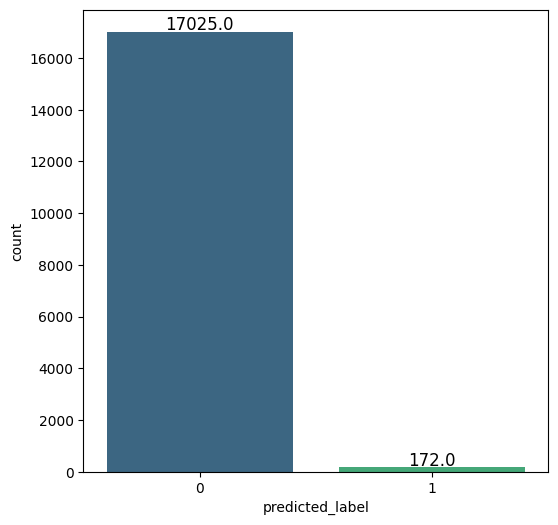

In [46]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_test, x="predicted_label", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Adjust text position (optional)
                textcoords='offset points')

# Show the plot
plt.show()

In [47]:
df_test[df_test['predicted_label'] == 1]

,id,tweet,cleaned_tweet,decoded_tweet,clean_duplicate,deemoji_tweet,predicted_label
278,32241,@user this '93 video - '16 when he referred to sen. warren as pocahontas = a stable pattern of and ignorance.â¦,this '93 video - '16 when he referred to sen. warren as pocahontas = a stable pattern of and ignorance.â¦,this '93 video - '16 when he referred to sen. warren as pocahontas = a stable pattern of and ignorance.…,this '93 video - '16 when he referred to sen. warren as pocahontas = a stable pattern of and ignorance.…,this '93 video '16 when he referred to sen. warren as pocahontas = a stable pattern of and ignorance.…,1
557,32520,"challenges #aap's claim that 70% #punjabis are #drugaddicts, dares it to prove","challenges 's claim that 70% are , dares it to prove","challenges 's claim that 70% are , dares it to prove","challenges 's claim that 70% are , dares it to prove","challenges 's claim that 70% are , dares it to prove",1
590,32553,trump ally made remarks towards obamas - cnn #carlpaladino,trump ally made remarks towards obamas - cnn,trump ally made remarks towards obamas - cnn,trump ally made remarks towards obamas - cnn,trump ally made remarks towards obamas cnn,1
643,32606,"racism in us, &amp; netanyahu commitment to genocide explain it #bbcnews #msnbc #npr #cnn #wsj #huffpostpol #nyt #wapoâ¦","racism in us, &amp; netanyahu commitment to genocide explain it ¦","racism in us, &amp; netanyahu commitment to genocide explain it","racism in us, &amp; netanyahu commitment to genocide explain it","racism in us, &amp; netanyahu commitment to genocide explain it",1
686,32649,since 1965 voting rights act dems have been blaming republicans 4 being biggots! new buzz word is racist!,since 1965 voting rights act dems have been blaming republicans 4 being biggots! new buzz word is racist!,since 1965 voting rights act dems have been blaming republicans 4 being biggots! new buzz word is racist!,since 1965 voting rights act dems have been blaming republicans 4 being biggots! new buzz word is racist!,since 1965 voting rights act dems have been blaming republicans 4 being biggots! new buzz word is racist!,1
...,...,...,...,...,...,...,...
16744,48707,"@user no man is above #unconsciousgenderbias in the workplace - it's ""unconscious"" via @user #sexiâ¦","no man is above in the workplace - it's ""unconscious"" via ¦","no man is above in the workplace - it's ""unconscious"" via","no man is above in the workplace - it's ""unconscious"" via","no man is above in the workplace it's ""unconscious"" via",1
16797,48760,""" dem policies give lgbt 'gender neutral' toilets to hide in with policies that allow radical muslims to shoot up other lgbt clubs""",""" dem policies give lgbt 'gender neutral' toilets to hide in with policies that allow radical muslims to shoot up other lgbt clubs""",""" dem policies give lgbt 'gender neutral' toilets to hide in with policies that allow radical muslims to shoot up other lgbt clubs""",""" dem policies give lgbt 'gender neutral' toilets to hide in with policies that allow radical muslims to shoot up other lgbt clubs""",""" dem policies give lgbt 'gender neutral' toilets to hide in with that allow radical muslims shoot up other clubs""",1
16805,48768,thought factory: bbc neutrality on right wing fascism #politics #media #blm #brexit #trump #leadership &gt;15,thought factory: bbc neutrality on right wing fascism &gt;15,thought factory: bbc neutrality on right wing fascism &gt;15,thought factory: bbc neutrality on right wing fascism &gt;15,thought factory bbc neutrality on right wing fascism &gt;15,1
17128,49091,@user the uk governmentâs new #anti-semitism definition conflates with valid criticism of #israel | opendemocracy,the uk governmentâs new -semitism definition conflates with valid criticism of | opendemocracy,the uk government’s new -semitism definition conflates with valid criticism of | opendemocracy,the uk government’s new -semitism definition conflates with valid criticism of | opendemocracy,the 